In [1]:
# загружаем датасеты
name1 = "dataset/features_list.csv" # типы данных переменных
name2 = "dataset/get_features.csv"  # генеральная совокупность
name3 = "dataset/get_status.csv"    # статусы

#### Задание

1) отобрать из генеральной совокупности столбцы, которые представлены в features_list.csv с типом данных numeric<br>
2) построить по отобранным столбцам корреляционный анализ с статусом (переменная status) из get_status<br>
3) отобрать из генеральной совокупности те столбцы (Переменые) , которые имеют корреляцию (по модулю!!!) <b>со переменной  статус</b> >= 0.05<br>
4) среди отобранных Переменных провести мультикорреляционный анализ (когда переменые коррелируют между собой)<br>
5) исключить из генеральной совокупности переменную, у которой с другой переменной корреляционная сила >= 0.5 и корреляция со статусом ниже<br>
6) по отобранным переменным построить гистограмму распредления значений и указать переменные (просто вывести их название) которые имеют нормальное распределение<br>
7) разбить репрезентативно выборку на тестовую и обучающую<br>
8) построить модель LogisticRegression использую библиотеку scikit learn<br>
9) вывести ключевые метрики точности и отобразить матрицу классификации<br><br>

кодировка файлов windows-1251 !!!<br>
разделитель ;<br>
 

1) отобрать из генеральной совокупности столбцы, которые представлены в features_list.csv с типом данных numeric<br>

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [3]:
df_1 = pd.read_csv(name1, index_col=0, delimiter=";", encoding="windows-1251") # создаём датафрейм для каждого датасета
df_2 = pd.read_csv(name2, index_col=0, delimiter=";", encoding="windows-1251")
df_3 = pd.read_csv(name3, index_col=0, delimiter=";", encoding="windows-1251")

In [4]:
feature_name = list(df_1[df_1['field_type']=='numeric']['feature_name']) # отбираем имена столбцов с типом данных numeric
df_task1 = df_2[feature_name]                                            # создаём датафрейм под таблицу задания

df_task1

,age_cred_history,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_active_loans_potr,cnt_loans,cnt_loans_avto,cnt_loans_credcard,cnt_loans_half_year_credcard,cnt_loans_half_year_micr,...,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_more_than_three_loaners,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,loaner_personal_data_changed_model,loaner_behaviour_model,one_cell_phone_more_than_one_loaner
0,5834,20,3,12,5,65,0,5,1,28,...,0.7604,0.4872,0.0,0.0,3,1,2,0.5580,0.8511,0.0
1,1792,19,1,15,3,78,0,1,0,10,...,0.5093,0.2380,0.0,0.0,1,1,2,0.6003,0.7200,0.0
2,3815,11,1,10,0,61,0,2,0,32,...,0.7097,0.5227,0.0,0.0,4,2,2,0.6532,0.8717,0.0
3,3091,19,1,17,1,133,0,9,0,75,...,0.7962,0.7004,0.0,0.0,5,2,2,0.6039,0.8822,0.0
4,4814,12,1,9,2,37,0,2,0,23,...,0.4574,0.5444,0.0,0.0,1,1,1,0.5784,0.8304,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,4586,20,0,20,0,76,0,3,0,69,...,0.3395,0.5654,0.0,0.0,2,1,1,0.3610,0.8358,0.0
1141,5286,7,4,3,0,46,0,4,0,1,...,0.6900,0.2748,0.0,0.0,3,1,2,0.5792,0.7460,0.0
1142,1155,29,2,21,6,53,0,2,0,42,...,0.2596,0.4878,0.0,0.0,3,1,1,0.5386,0.8511,0.0
1143,771,14,0,13,0,61,0,0,0,22,...,0.8081,0.4251,0.0,0.0,4,1,2,0.5413,0.7534,0.0


2) построить по отобранным столбцам корреляционный анализ с статусом (переменная status) из get_status

In [5]:
df_task2 = pd.DataFrame(index=['status'],columns=df_task1.columns)

for i in df_task1.columns:
    df_task2[i][0] = df_task1[i].corr(df_3['status'])              # делаем корреляцию каждого столбца со статусом

df_task2   

,age_cred_history,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_active_loans_potr,cnt_loans,cnt_loans_avto,cnt_loans_credcard,cnt_loans_half_year_credcard,cnt_loans_half_year_micr,...,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_more_than_three_loaners,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,loaner_personal_data_changed_model,loaner_behaviour_model,one_cell_phone_more_than_one_loaner
status,-0.0165007,-0.109943,-0.0801771,-0.104246,0.0133948,-0.133108,-0.0142665,-0.124545,0.0246579,-0.106067,...,0.1248,0.0863171,0.0372343,0.0509306,0.0744216,0.0867775,0.101556,0.0432268,0.0011378,0.0623764


3) отобрать из генеральной совокупности те столбцы (Переменые) , которые имеют корреляцию (по модулю!!!) со переменной статус >= 0.05

In [6]:
corr_005 = []                                               # массив с именами столбцов, чья корреляция >= 0.05

for i in df_task2.columns:
    if abs(df_task2[i][0]) >= 0.05:                         # условие отбора столбцов
        corr_005.append(df_task2[i].name)                   # добавление в массив имени отобранного столбца

df_task3 = pd.DataFrame(columns=corr_005, data = df_task1)
df_task3

,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_loans,cnt_loans_credcard,cnt_loans_half_year_micr,cnt_loans_micr,cnt_open_micro_loans_in_the_last_90_days,cnt_request_cred_history_30,cnt_request_micro_loans_in_the_last_30_days,...,score_value,neuro_net_for_mfo,model_2_personal_data_changed,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,one_cell_phone_more_than_one_loaner
0,20,3,12,65,5,28,30,11,25,4,...,694,0.2949,0.5690,0.7604,0.4872,0.0,3,1,2,0.0
1,19,1,15,78,1,10,71,4,11,2,...,628,0.2370,0.5555,0.5093,0.2380,0.0,1,1,2,0.0
2,11,1,10,61,2,32,53,9,9,2,...,763,0.3290,0.7579,0.7097,0.5227,0.0,4,2,2,0.0
3,19,1,17,133,9,75,114,15,29,3,...,742,0.4086,0.6350,0.7962,0.7004,0.0,5,2,2,0.0
4,12,1,9,37,2,23,23,9,24,5,...,691,0.4381,0.4211,0.4574,0.5444,0.0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1140,20,0,20,76,3,69,69,20,44,5,...,570,0.4970,0.3672,0.3395,0.5654,0.0,2,1,1,0.0
1141,7,4,3,46,4,1,3,1,15,5,...,633,0.4227,0.5238,0.6900,0.2748,0.0,3,1,2,0.0
1142,29,2,21,53,2,42,42,21,18,3,...,683,0.3609,0.4209,0.2596,0.4878,0.0,3,1,1,0.0
1143,14,0,13,61,0,22,60,4,16,3,...,617,0.4377,0.5742,0.8081,0.4251,0.0,4,1,2,0.0


4) среди отобранных Переменных провести мультикорреляционный анализ (когда переменые коррелируют между собой)


In [7]:
df_task4 = pd.DataFrame(index=df_task3.columns, columns=df_task3.columns) # создаём квадратный датафрейм

for i in df_task3.columns:
    for j in df_task3.columns:
        df_task4[i].loc[j] = df_task3[i].corr(df_task3[j])               # делаем корреляцию переменных между собой

df_task4

,cnt_active_loans,cnt_active_loans_credcard,cnt_active_loans_micr,cnt_loans,cnt_loans_credcard,cnt_loans_half_year_micr,cnt_loans_micr,cnt_open_micro_loans_in_the_last_90_days,cnt_request_cred_history_30,cnt_request_micro_loans_in_the_last_30_days,...,score_value,neuro_net_for_mfo,model_2_personal_data_changed,model_1_personal_data_changed,model_loaner_behaviour,model_one_cell_phone_two_loaners,unique_work_phones_last_365_days,unique_cell_phones_last_180_days,unique_cell_phones_last_two_years,one_cell_phone_more_than_one_loaner
cnt_active_loans,1,0.401133,0.929586,0.452929,0.381665,0.547406,0.420634,0.800056,0.16396,0.0493313,...,-0.159292,-0.173583,-0.23924,-0.047407,0.111118,-0.0546333,0.0216211,-0.0874981,-0.121639,-0.0433154
cnt_active_loans_credcard,0.401133,1,0.122102,0.0127026,0.771519,-0.0119916,-0.045893,0.124927,0.0204107,-0.00112183,...,0.0311423,-0.0911583,-0.0852132,0.00201182,0.0393298,-0.0334827,-0.0415235,-0.034904,-0.0440219,-0.0392001
cnt_active_loans_micr,0.929586,0.122102,1,0.497603,0.142283,0.631533,0.492883,0.86131,0.1913,0.0622531,...,-0.190006,-0.158442,-0.241754,-0.0657378,0.119296,-0.048503,0.0464608,-0.0907276,-0.114575,-0.0370354
cnt_loans,0.452929,0.0127026,0.497603,1,0.11403,0.628589,0.993076,0.333424,-0.0444144,-0.0951214,...,-0.160927,-0.129184,-0.199314,-0.0597677,-0.0608985,-0.0115756,-0.0240163,-0.0535393,-0.0504478,-0.0293518
cnt_loans_credcard,0.381665,0.771519,0.142283,0.11403,1,0.0284154,0.0339216,0.119415,-0.0220145,-0.0318762,...,0.0145869,-0.109633,-0.0618405,0.0443766,-0.00832527,-0.0108751,-0.0803755,-0.00644019,-0.003339,-0.0198057
cnt_loans_half_year_micr,0.547406,-0.0119916,0.631533,0.628589,0.0284154,1,0.637268,0.677085,0.297865,0.0894589,...,-0.096108,-0.0537474,-0.142152,-0.0300015,0.207706,-0.0034957,0.120585,-0.0366363,-0.0733975,-0.00588589
cnt_loans_micr,0.420634,-0.045893,0.492883,0.993076,0.0339216,0.637268,1,0.331292,-0.0378916,-0.0952762,...,-0.165929,-0.122244,-0.198059,-0.0676079,-0.0548123,-0.00765212,-0.012154,-0.0542913,-0.0529518,-0.0253347
cnt_open_micro_loans_in_the_last_90_days,0.800056,0.124927,0.86131,0.333424,0.119415,0.677085,0.331292,1,0.393679,0.209513,...,-0.0391012,-0.0794701,-0.165662,-0.0456629,0.251677,-0.0587498,0.0984313,-0.072095,-0.109358,-0.0427602
cnt_request_cred_history_30,0.16396,0.0204107,0.1913,-0.0444144,-0.0220145,0.297865,-0.0378916,0.393679,1,0.591796,...,0.167772,0.223094,0.11808,0.19441,0.542963,0.0401132,0.186492,0.0964099,0.0450925,0.0621843
cnt_request_micro_loans_in_the_last_30_days,0.0493313,-0.00112183,0.0622531,-0.0951214,-0.0318762,0.0894589,-0.0952762,0.209513,0.591796,1,...,0.0806684,0.214101,0.0458887,0.0647176,0.229775,0.0430816,0.0545395,0.0132636,-0.0178482,0.0353266


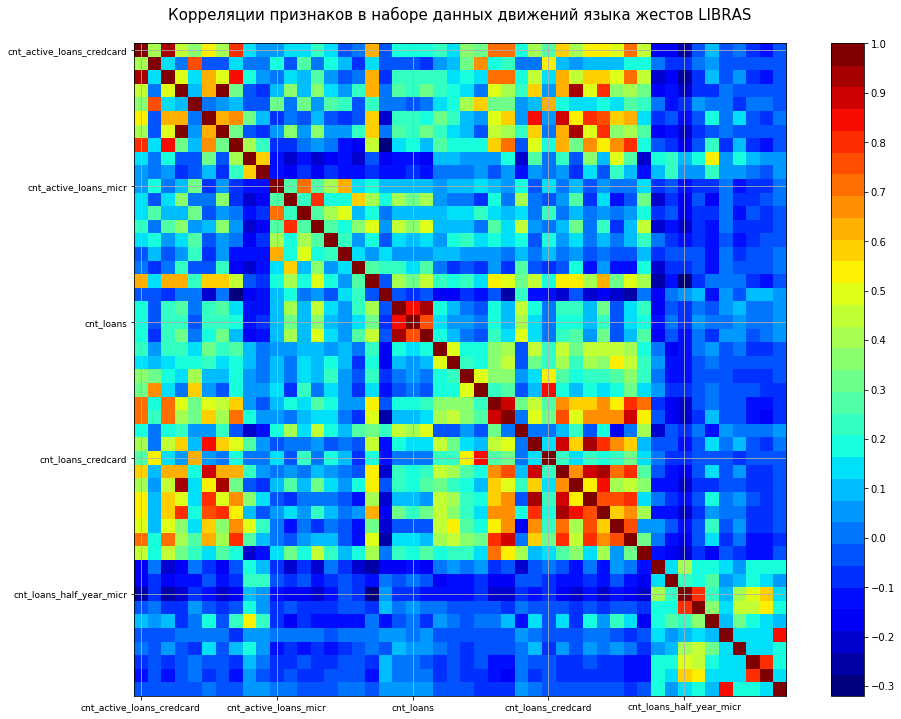

In [18]:
import warnings
warnings.filterwarnings("ignore")

def correlation_matrix(df):
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(16,12))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), cmap=cmap)
    ax1.grid(True)
    plt.title('Корреляции признаков в наборе данных движений языка жестов LIBRAS\n',fontsize=15)
    labels=df.columns
    ax1.set_xticklabels(labels,fontsize=9)
    ax1.set_yticklabels(labels,fontsize=9)
    fig.colorbar(cax, ticks=[0.1*i for i in range(-11,11)])
    plt.show()

correlation_matrix(df_task3)

5) исключить из генеральной совокупности переменную, у которой с другой переменной корреляционная сила >= 0.5 и корреляция со статусом ниже


In [9]:
corr_05 = []                                                    # массив с именами столбцов, чья корреляция 
                                                                # с другими столбцами >= 0.5, а корреляция со статусом < 0.5
for i in df_task4.index:
    for j in df_task4.columns:
        if (df_task4[i][j] >= 0.5) & (df_task2[i][0] < df_task4[i][j]) & (i!=j):
            corr_05.append(df_task4[i].name)
            
corr_05 = list(set(corr_05))                                    # удаляем дубликаты названий столбцов

df_task5 = pd.DataFrame(columns=(list(set(corr_005) - set(corr_05))), data = df_task3) # удаляем отобранные столбцы из датафрейма
df_task5

,score_value,neuro_net_for_mfo,unique_work_phones_last_365_days,delay_5_potr,max_delay_days_micr,sum_active_loans_overdue_micr
0,694,0.2949,3,44,0,0.00
1,628,0.2370,1,0,1002,37350.00
2,763,0.3290,4,0,0,0.00
3,742,0.4086,5,7,0,0.00
4,691,0.4381,1,0,0,0.00
...,...,...,...,...,...,...
1140,570,0.4970,2,2,4,28700.00
1141,633,0.4227,3,13,266,205700.12
1142,683,0.3609,3,3,0,0.00
1143,617,0.4377,4,0,106,22595.83


6) по отобранным переменным построить гистограмму распредления значений и указать переменные (просто вывести их название) которые имеют нормальное распределение


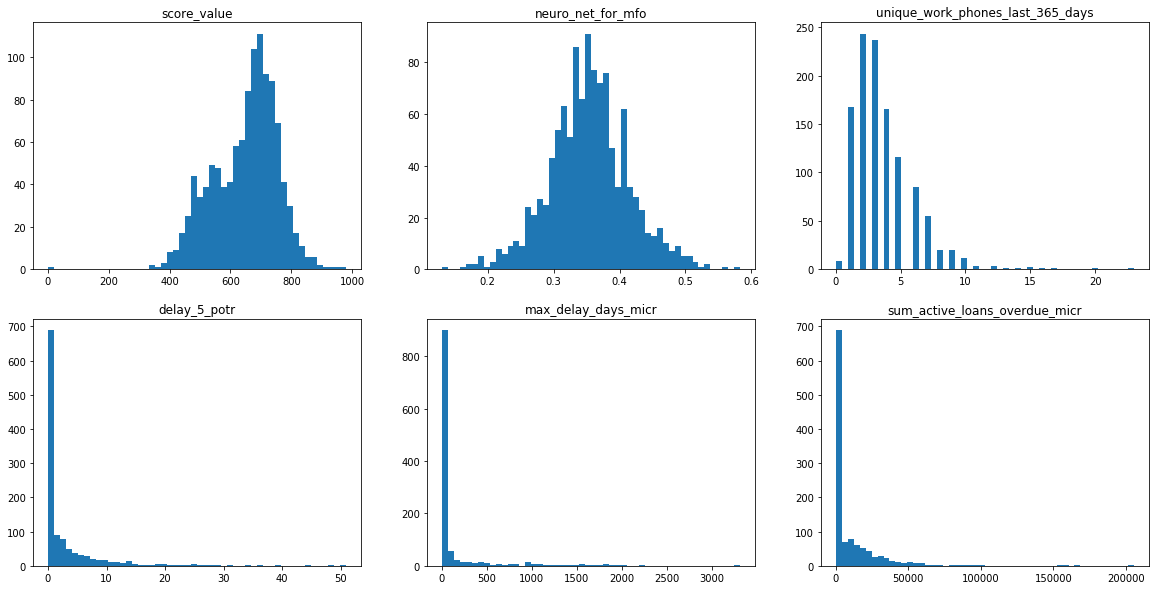

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(20,10))                   # задаём количество диаграмм и их размер
count = 0
for i in range(0,2):
    for j in range(0,3):
        axs[i,j].hist(df_task5[df_task5.columns[count]],bins=50) # создаём столбчатые диаграммы
        axs[i,j].set_title(df_task5.columns[count])              # задаём название для каждой диаграммы
        count += 1
plt.show()

In [11]:
print('Переменные, которые имеют нормальное распределение: neuro_net_for_mfo, score_value')

Переменные, которые имеют нормальное распределение: neuro_net_for_mfo, score_value


7) разбить репрезентативно выборку на тестовую и обучающую


In [12]:
np.set_printoptions(precision=3)

X = df_task5 [['neuro_net_for_mfo', 'score_value']]
scaler = MinMaxScaler(feature_range=(0, 1)) # значения признаков от 0 до 1
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, np.array(df_3['status']), test_size=0.25)

8) построить модель LogisticRegression использую библиотеку scikit learn


In [13]:
clf = LogisticRegression(penalty='none')         # создаём экземпляр модели
clf.fit(X_train, y_train)          # обучаем модель
y_pred = clf.predict(X_test)  # предсказываем новые данные

9) вывести ключевые метрики точности и отобразить матрицу классификации

In [14]:
mislabel = np.sum((y_test!=y_pred)) # считаем неправильно посчитанные значения

print("Количество неправильно классифицированных точек из {} точек тестового множества равно {}".format(len(y_test),mislabel))

print("Отчет о классификации:\n")
print(classification_report(y_test,y_pred))

Количество неправильно классифицированных точек из 287 точек тестового множества равно 88
Отчет о классификации:

              precision    recall  f1-score   support

         0.0       0.40      0.02      0.04        87
         1.0       0.70      0.98      0.82       200

    accuracy                           0.69       287
   macro avg       0.55      0.50      0.43       287
weighted avg       0.61      0.69      0.58       287



In [15]:
# матрица ошибок
conf_mat=confusion_matrix(y_test,y_pred)  
print(conf_mat)

[[  2  85]
 [  3 197]]


In [16]:
score = clf.score(X_test, y_test) # точность производительности модели
print(score)

0.6933797909407665


In [17]:
y_pred = clf.predict(X) # предсказываем новые данные
y_pred

array([1., 1., 1., ..., 1., 1., 1.])